<a href="https://colab.research.google.com/github/Garimagupta85/Default-Prediction/blob/main/EDA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [36]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import gc

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Loading Data 

In [2]:
#loading amex data (parquet form) from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '1JKPJVwQjn72xuXjFpz_DQy6MZtbNFg_2' 
test_file_id = '1ADD4KUHP4nSz_-YBEFClD1DTpSZhmMM-'
train_labels_file_id = '1kEh1YWz1xyHifimo_3y5vzyNEV_Lk0ZA'

download = drive.CreateFile({'id': train_file_id})
# Download the training data to a local disc
download.GetContentFile('train-data.parquet')
train_data  = pd.read_parquet("train-data.parquet")
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [3]:
download = drive.CreateFile({'id': test_file_id})
# Download the test data to a local disc
download.GetContentFile('test-data.parquet')
test_data  = pd.read_parquet("test-data.parquet")
test_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008281,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009021,NaN,0.003695,0.003753,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002114,0.004656,NaN,0.003155,0.002156,0.006482
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614911,0.009065,0.021672,0.816549,0.009722,0.188947,0.004123,0.015325,...,NaN,NaN,NaN,0.004743,0.006392,0.002890,NaN,0.006044,0.005206,0.007855
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591673,0.238794,0.015923,0.810456,0.002026,0.180035,0.000731,0.011281,...,NaN,NaN,NaN,0.008133,0.004329,0.008384,NaN,0.001008,0.007421,0.009471


In [4]:
download = drive.CreateFile({'id': train_labels_file_id})
# Download the training labels to a local disc
download.GetContentFile('train-labels-data.csv')
train_labels_data  = pd.read_csv("train-labels-data.csv")
train_labels_data.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


## Preprocessing the data

In [5]:
train_data = train_data.merge(train_labels_data, left_on='customer_ID', right_on='customer_ID')
train_data.shape

(5531451, 192)

In [6]:
print(f'Train dates range is from {train_data["S_2"].min()} to {train_data["S_2"].max()}.')

Train dates range is from 2017-03-01 to 2018-03-31.


In [7]:
categorical_features = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
train_data[categorical_features] = train_data[categorical_features].astype("category")
train_data[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

## EDA

In [8]:
feat_Delinquency = [c for c in train_data.columns if c.startswith('D_')]
feat_Spend = [c for c in train_data.columns if c.startswith('S_')]
feat_Payment = [c for c in train_data.columns if c.startswith('P_')]
feat_Balance = [c for c in train_data.columns if c.startswith('B_')]
feat_Risk = [c for c in train_data.columns if c.startswith('R_')]
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [9]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

In [10]:
fig = go.Figure()
fig.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig.show()

In [11]:
missing_values = train_data.isna().sum()
print("Total missing values" , sum(missing_values))

Total missing values 160858968


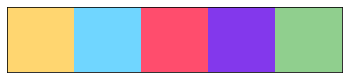

In [12]:
#Custom Color Palette 🎨
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

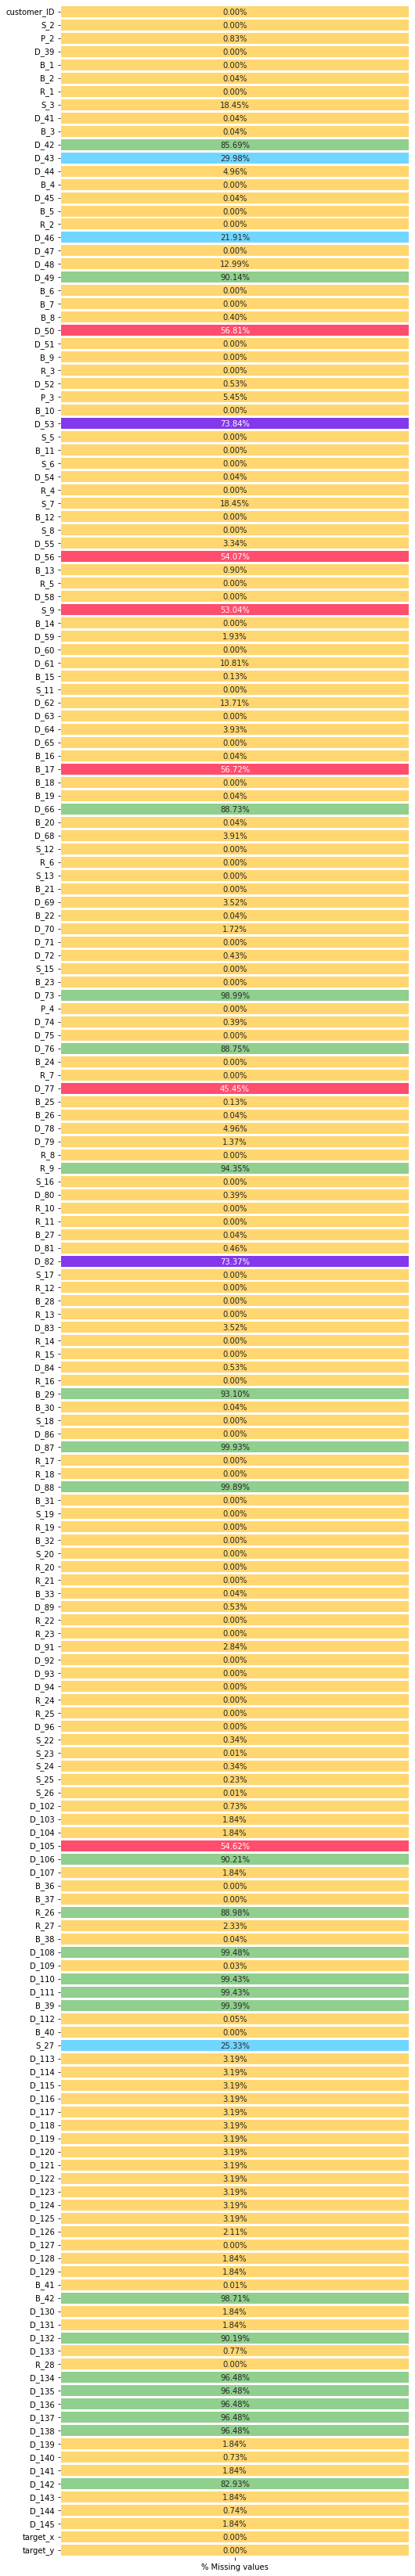

In [13]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = train_data.isnull().sum()/len(train_data))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()


In [14]:
stat_plot = train_data.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = stat_plot['S_2'], y = stat_plot['customer_ID']))
fig.update_layout(title="Customer Statements", width = 800, height = 600,xaxis_title ='Statement Date',
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)') 
fig['data'][0]['line']['color']="#ff9770"
fig.show()

In [15]:
import gc
gc.collect()

2174

In [16]:
del_cols = [c for c in train_data.columns if (c.startswith(('D','t'))) & (c not in categorical_features)]
df_del = train_data[del_cols]
spd_cols = [c for c in train_data.columns if (c.startswith(('S','t'))) & (c not in categorical_features)]
df_spd = train_data[spd_cols]
pay_cols = [c for c in train_data.columns if (c.startswith(('P','t'))) & (c not in categorical_features)]
df_pay = train_data[pay_cols]
bal_cols = [c for c in train_data.columns if (c.startswith(('B','t'))) & (c not in categorical_features)]
df_bal = train_data[bal_cols]
ris_cols = [c for c in train_data.columns if (c.startswith(('R','t'))) & (c not in categorical_features)]
df_ris = train_data[ris_cols]

### Feature correlation in default class

### Feature correlation in paid class

### Correlation between different variable types with themselves

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



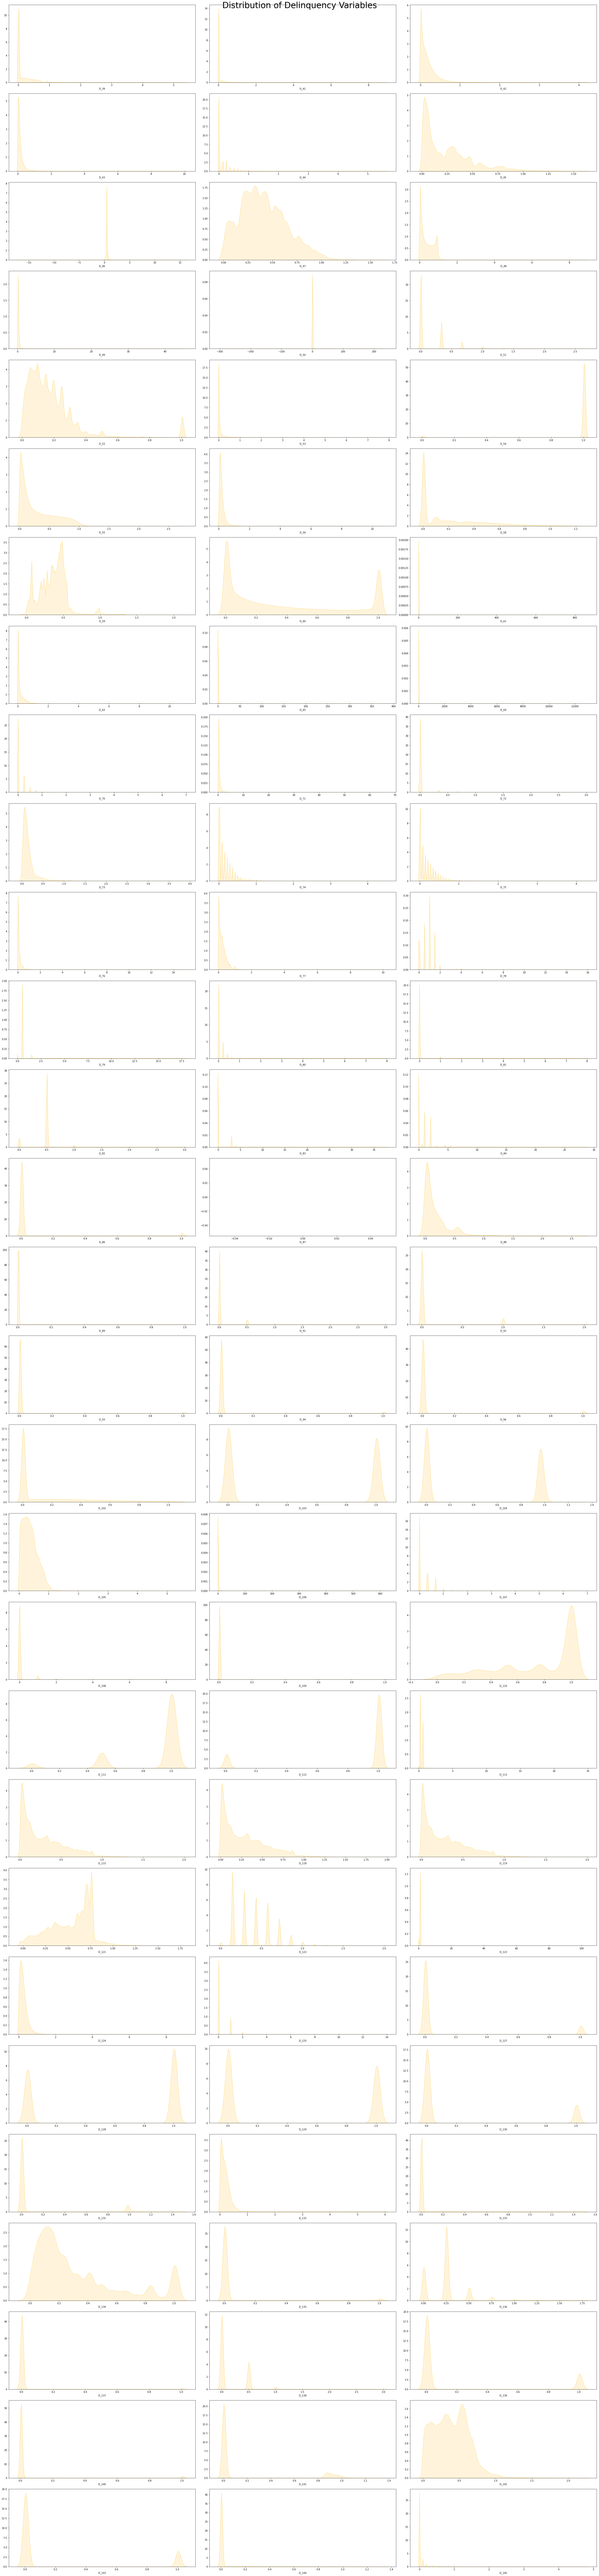

In [18]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols) - 1:
        sns.kdeplot(x = del_cols[i], data = df_del, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Delinquency Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

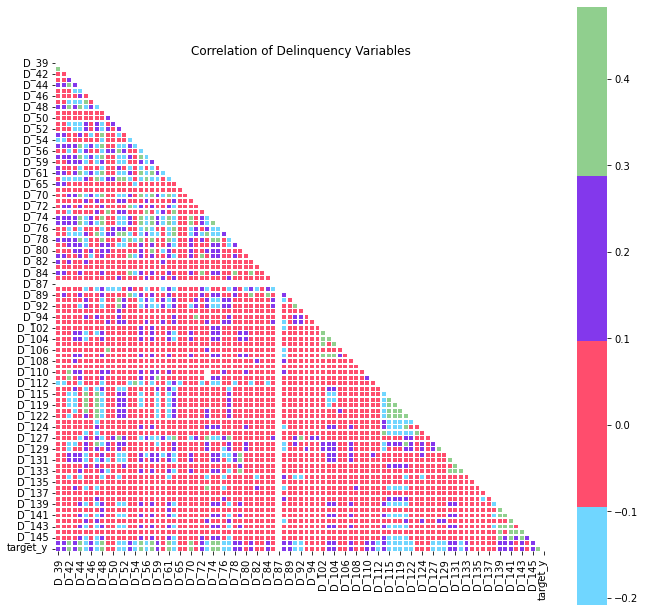

In [19]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

### Dependency of different variable types on payment variables

TypeError: ignored

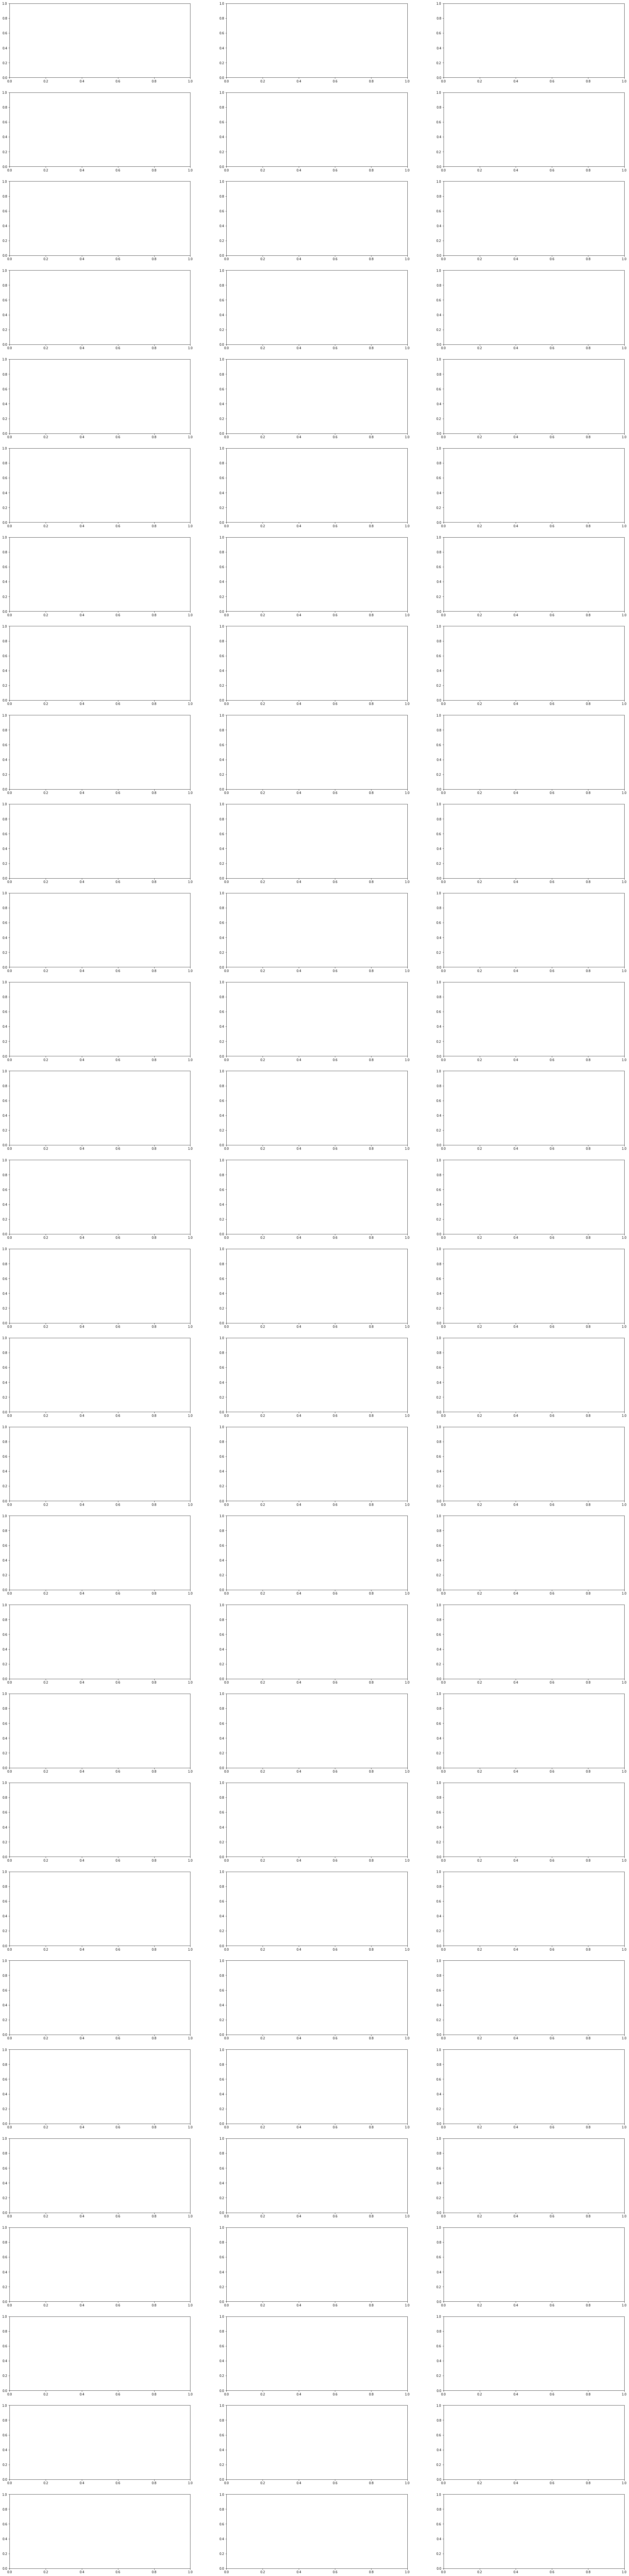

In [22]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(spd_cols) - 1:
        sns.kdeplot(x = spd_cols[i], data = df_spd, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Spend Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

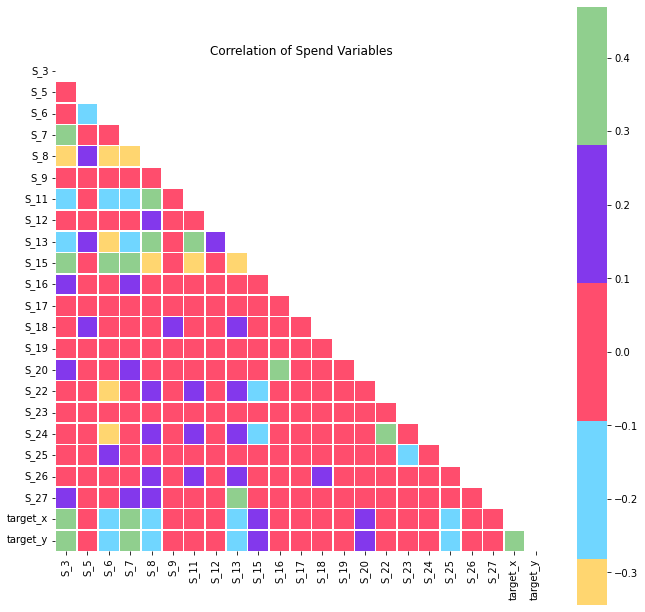

In [21]:
plt.figure(figsize =(11,11))
corr = df_spd.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Spend Variables')
plt.show()

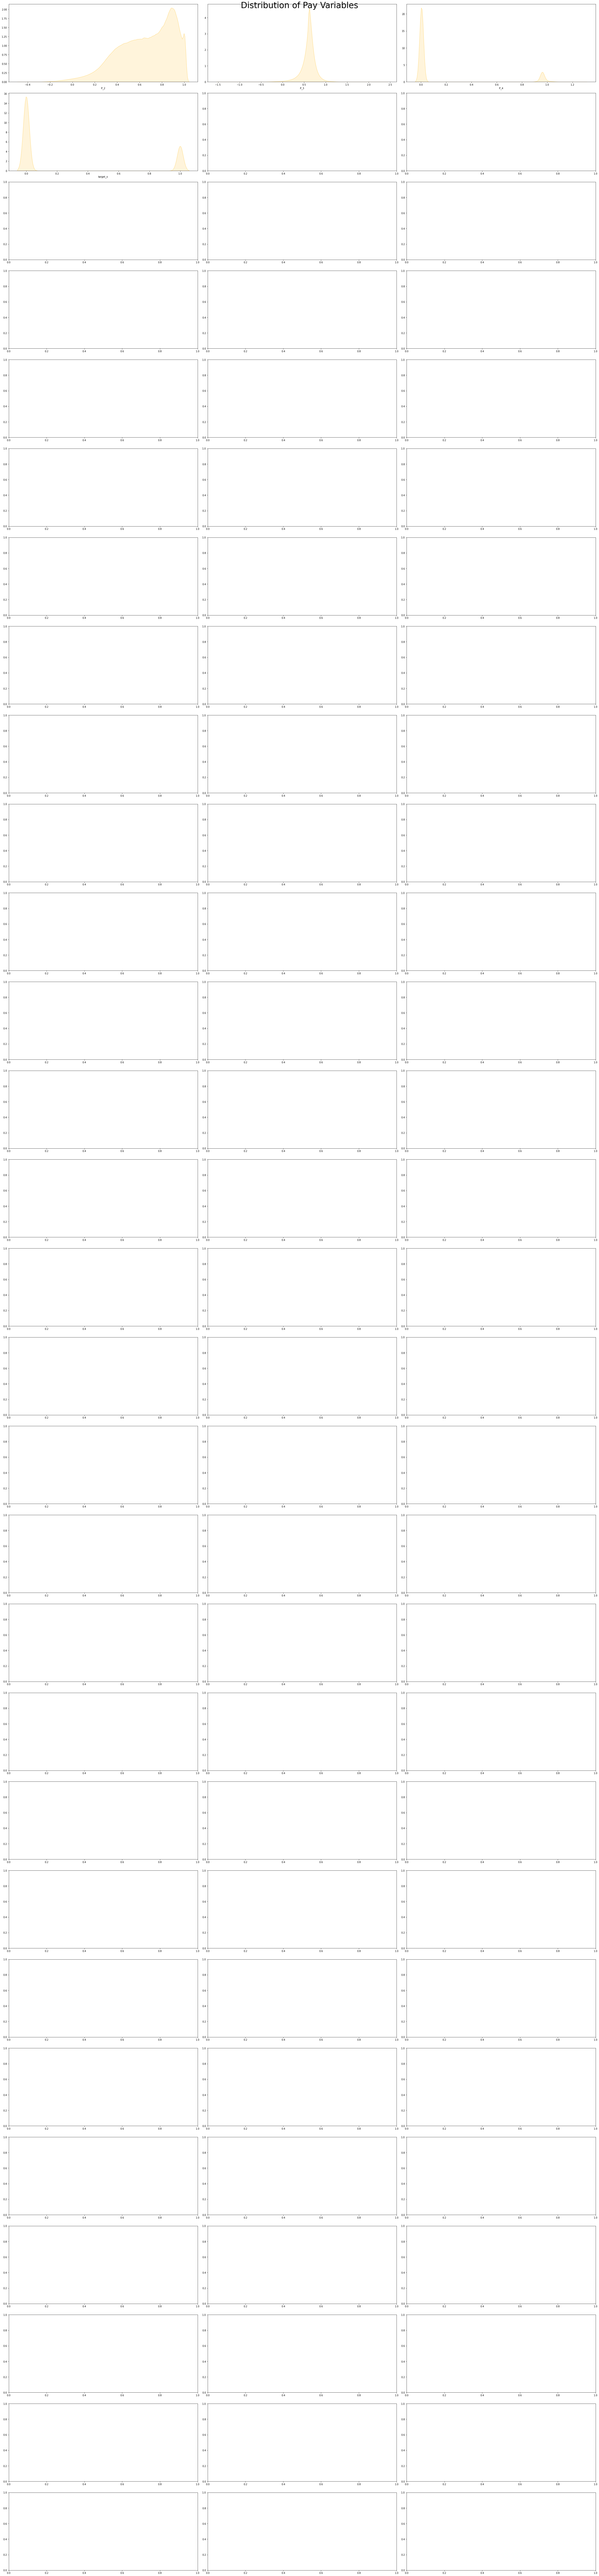

In [24]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(pay_cols) - 1:
        sns.kdeplot(x = pay_cols[i], data = df_pay, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Pay Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize =(11,11))
corr = df_pay.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Pay Variables')
plt.show()

In [ ]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(bal_cols) - 1:
        sns.kdeplot(x = bal_cols[i], data = df_bal, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Balance Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize =(11,11))
corr = df_bal.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Balance Variables')
plt.show()

In [ ]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(ris_cols) - 1:
        sns.kdeplot(x = ris_cols[i], data = df_ris, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Risk Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize =(11,11))
corr = df_ris.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

## Preprocessing data for training model

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Columns: 192 entries, customer_ID to target_y
dtypes: category(11), float32(176), int64(3), object(2)
memory usage: 4.1+ GB


In [28]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [29]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for cat_feat in cat_cols:
    train_data[cat_feat] = lab_enc.fit_transform(train_data[cat_feat])
    test_data[cat_feat] = lab_enc.transform(test_data[cat_feat])

In [31]:
# define dataset
X = train_data.drop('target_y', axis=1)
y = train_data['target_y']

In [32]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4425160, 191)
y_train: (4425160,)
X_test: (1106291, 191)
y_test: (1106291,)


## Training

In [34]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.5 MB/s 


In [35]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations = 3000, random_state = 42, nan_mode ='Min',task_type ="GPU")
clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], cat_features=cat_cols,  verbose = 100)
preds = clf.predict_proba(X_test)[:, 1]

CatBoostError: ignored

In [ ]:
#training and evaluating lightgbm, xgboost and catboost, with median and mean features
criterias = ['median', 'mean']
models_types = [['catboost', True], ['lightgbm', False], ['xgboost', False]]
models_dict = {'lightgbm':LGBMClassifier, 'xgboost':XGBClassifier, 'catboost':CatBoostClassifier}
trained_models = []
results = pd.DataFrame()
# results_data_type = pd.concat([models_schedulers[0].df_stats, models_schedulers[1].df_stats, models_schedulers[2].df_stats, models_schedulers[3].df_stats], ignore_index=True)

In [ ]:
for model_type_elem in models_types:
    for criteria in criterias:
        model_type = model_type_elem[0]
        is_silent = model_type_elem[1]
        print('Using the {} model with the {} features'.format(model_type, criteria))
        model = models_dict[model_type]()
        if (criteria == 'median'):
            model, df_stats = train_and_eval_model(model, model_type, x_train_median, x_test_median, y_train_median, y_test_median, criteria, is_silent)
            trained_models.append(model)
            results = pd.concat([results, df_stats])
        if (criteria == 'mean'):
            model, df_stats = train_and_eval_model(model, model_type, x_train_mean, x_test_mean, y_train_mean, y_test_mean, criteria, is_silent)
            trained_models.append(model)
            results = pd.concat([results, df_stats])
        print()

## Evaluation

In [ ]:
results